IT집중교육2 
Practice1
정민규(201820736 소프트웨어학과)

In [1]:
import numpy as np
import torch 
import torch.nn.functional as F
import glob
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import datasets, transforms
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt
from torch.autograd import Function

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [3]:
import random

idx_for_divide = [i for i in range(0, 500)]
random.shuffle(idx_for_divide)
idx_for_train = idx_for_divide[:450]
idx_for_val = idx_for_divide[450:]

In [35]:
class myDataset(Dataset): 
  def __init__(self, path, phase, transform = None):
    self.path = path
    self.phase = phase
    self.daisy_path = path + 'daisy'
    self.dandelion_path = path + 'dandelion'
    self.roses_path = path + 'roses'
    self.sunflowers_path = path + 'sunflowers'
    self.tulips_path = path + 'tulips'

    self.daisy_img_list = glob.glob(self.daisy_path + '/*.jpg')
    self.dandelion_img_list = glob.glob(self.dandelion_path + '/*.jpg')
    self.roses_img_list = glob.glob(self.roses_path + '/*.jpg')
    self.sunflowers_img_list = glob.glob(self.sunflowers_path + '/*.jpg')
    self.tulips_img_list = glob.glob(self.tulips_path + '/*.jpg')
    
    if phase == 'train':
      temp = []
      for i in idx_for_train:
        temp.append(self.daisy_img_list[i])
      self.daisy_img_list = temp

      temp = []
      for i in idx_for_train:
        temp.append(self.dandelion_img_list[i])
      self.dandelion_img_list = temp

      temp = []
      for i in idx_for_train:
        temp.append(self.roses_img_list[i])
      self.roses_img_list = temp

      temp = []
      for i in idx_for_train:
        temp.append(self.sunflowers_img_list[i])
      self.sunflowers_img_list = temp

      temp = []
      for i in idx_for_train:
        temp.append(self.tulips_img_list[i])
      self.tulips_img_list = temp
      
      
    elif phase == 'val':
      temp = []
      for i in idx_for_val:
        temp.append(self.daisy_img_list[i])
      self.daisy_img_list = temp

      temp = []
      for i in idx_for_val:
        temp.append(self.dandelion_img_list[i])
      self.dandelion_img_list = temp

      temp = []
      for i in idx_for_val:
        temp.append(self.roses_img_list[i])
      self.roses_img_list = temp

      temp = []
      for i in idx_for_val:
        temp.append(self.sunflowers_img_list[i])
      self.sunflowers_img_list = temp

      temp = []
      for i in idx_for_val:
        temp.append(self.tulips_img_list[i])
      self.tulips_img_list = temp
    else:
      pass
      
    self.transform = transform
    self.img_list = self.daisy_img_list + self.dandelion_img_list + self.roses_img_list + self.sunflowers_img_list + self.tulips_img_list
    self.class_list = [0]*len(self.daisy_img_list) + [1]*len(self.dandelion_img_list) + [2]*len(self.roses_img_list) + [3]*len(self.sunflowers_img_list) + [4]*len(self.tulips_img_list)
    


  def __len__(self): 
    return len(self.img_list)

  def __getitem__(self, idx): 
    img_path = self.img_list[idx]
    label = self.class_list[idx]
    img = Image.open(img_path)

    if self.transform is not None:
      img = self.transform(img)

    return img, label

In [36]:
transforms_train = transforms.Compose([
  # transforms.RandomResizedCrop(224),
  # transforms.Resize((180,180)),
  # transforms.Resize((64,64)),
  transforms.Resize((224,224)),
  transforms.RandomHorizontalFlip(0.5),
  transforms.ToTensor(),
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transforms_val = transforms.Compose([
  # transforms.Resize((64,64)),
  # transforms.CenterCrop(224),
  # transforms.Resize((180,180)),
  transforms.Resize((224,224)),
  transforms.ToTensor(),
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transforms_test = transforms.Compose([
  # transforms.Resize((64,64)),
  # transforms.CenterCrop(224),
  # transforms.Resize((180,180)),
  transforms.Resize((224,224)),
  transforms.ToTensor(),
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [37]:
"""----------train dataset init-----------"""
train_dataset = myDataset('C:/Users/gnaro/Desktop/AJOU222_ITIP2_Practice/1031/train/', 'train', transforms_train)
train_dataset_size = len(train_dataset)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=False)

"""----------validation dataset init-----------"""
val_dataset = myDataset('C:/Users/gnaro/Desktop/AJOU222_ITIP2_Practice/1031/train/', 'val', transforms_val)
val_dataset_size = len(val_dataset)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True, drop_last=False)

"""----------dataloaders for train/val function-----------"""
dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': train_dataset_size, 'val': val_dataset_size}

"""----------classes-----------"""
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

print("train dataset size: {}".format(train_dataset_size))
print("validation dataset size: {}".format(val_dataset_size))

train dataset size: 2250
validation dataset size: 250


In [38]:
"""test dataset init"""
test_dataset = myDataset('C:/Users/gnaro/Desktop/AJOU222_ITIP2_Practice/1031/test/', 'test', transforms_test)
test_dataset_size = len(test_dataset)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, drop_last=False)

print("test dataset size: {}".format(test_dataset_size))

test dataset size: 500


Class별 2장 씩 보여주기

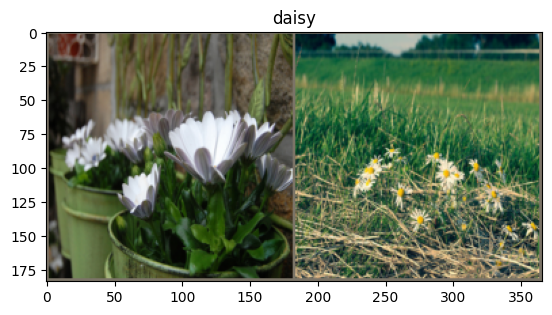

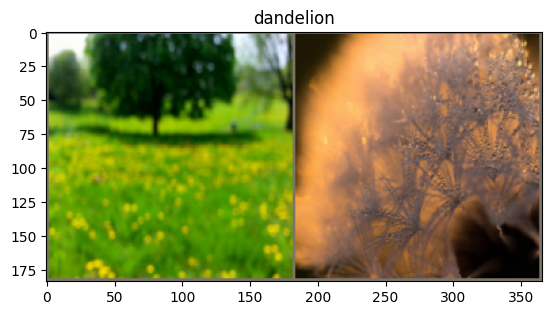

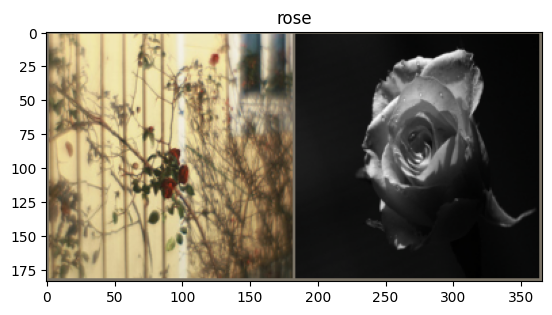

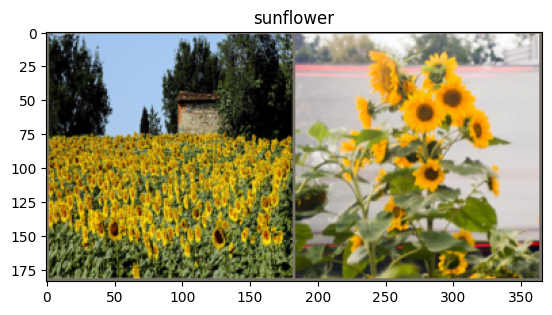

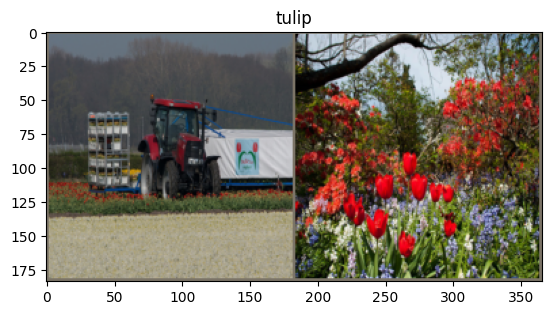

In [39]:
from torchvision.utils import make_grid

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  

image_class_cnts = [0,0,0,0,0]
plot_images = [[],[],[],[],[]]
inputs, classes = next(iter(train_dataloader))
for i, c in zip(inputs, classes):
  if image_class_cnts[c] < 2:
    plot_images[c].append(i)
  image_class_cnts[c] += 1
inputs, classes = next(iter(train_dataloader))
for i, c in zip(inputs, classes):
  if image_class_cnts[c] < 2:
    plot_images[c].append(i)
  image_class_cnts[c] += 1

for i, img in enumerate(plot_images):
  out = make_grid(img)
  imshow(out, title=class_names[i])

In [40]:
"""----------my activation function(ReLU)----------"""
class myReLU(nn.Module):
  def __init__(self):
      super(myReLU, self).__init__()

  def forward(self, input):
      output = input.clamp(min=0)
      return output

In [51]:
class MyGoogeNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        # channel: 3 (RGB), w*h: 224*224
        # channel: 3 (RGB), w*h: 180*180
        self.conv1 = nn.Sequential(
            # nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False),
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False),
            # (224-5+0)/1+1 = 220
            # (180-3+2)/1+1 = 180
            # (64-5+0)/1+1 = 60
            myReLU(),
            # nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
            # (220-3+0)/2+1 = 109
            # (180-3+2)/2+1 = 90
            # (60-3+0)/2+1 = 29
        )
        
        self.conv2 = nn.Sequential(
            # nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            # (109-5+0)/1+1 = 105
            # (90-3+2)/1+1 = 90 
            # (29-5+0)/1+1 = 25
            myReLU(),
            # nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
            # (105-3)/2+1=52
            # (90-3+2)/2+1=45
            # (25-3)/2+1=12
        )

        self.conv3 = nn.Sequential(
            # nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            # (52-3+0)/1+1 = 50
            # (45-3+2)/1+1 = 45
            # (12-3+0)/1+1 = 10
            myReLU(),
            # nn.MaxPool2d(kernel_size=5, stride=2, padding=1)
            nn.MaxPool2d(kernel_size=5, stride=2, padding=1)
            # (45-5+2)/2+1=22
        )

        self.hidden1 = nn.Sequential(
            # nn.Linear(22*22*64,512),
            nn.Linear(22*22*64,512),
            myReLU()
        )
        self.drop = nn.Dropout(0.5)
        self.hidden2 = nn.Linear(512,5)

    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = self.hidden1(x)
        x = self.drop(x)
        x = self.hidden2(x)

        return x

In [52]:
def eval_model_mgn(model, test_data, criterion):
    since = time.time()

    model.eval()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in test_data:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        
    test_loss = running_loss / test_dataset_size
    test_acc = running_corrects.double() / test_dataset_size

    print(f'Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

    time_elapsed = time.time() - since
    print(f'Test complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

    return

In [53]:
import copy
import time
def train_model_mgn(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    # print(outputs)
                    # print(labels)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [54]:
import torch.optim as optim
from torch.optim import lr_scheduler

model_mgn = MyGoogeNet()
model_mgn = model_mgn.to(device)
criterion_mgn = nn.CrossEntropyLoss()
optimizer_mgn = optim.SGD(model_mgn.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler_mgn = lr_scheduler.StepLR(optimizer_mgn, step_size=7, gamma=0.1)

In [55]:
from torchsummary import summary
summary(model_mgn, (3, 180, 180), device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 180, 180]             432
            myReLU-2         [-1, 16, 180, 180]               0
         MaxPool2d-3           [-1, 16, 90, 90]               0
            Conv2d-4           [-1, 32, 90, 90]           4,640
            myReLU-5           [-1, 32, 90, 90]               0
         MaxPool2d-6           [-1, 32, 45, 45]               0
            Conv2d-7           [-1, 64, 45, 45]          18,496
            myReLU-8           [-1, 64, 45, 45]               0
         MaxPool2d-9           [-1, 64, 22, 22]               0
           Linear-10                  [-1, 512]      15,860,224
           myReLU-11                  [-1, 512]               0
          Dropout-12                  [-1, 512]               0
           Linear-13                    [-1, 5]           2,565
Total params: 15,886,357
Trainable para

In [56]:
model_mgn = train_model_mgn(model_mgn, criterion_mgn, optimizer_mgn, exp_lr_scheduler_mgn,num_epochs=50)

Epoch 0/49
----------
train Loss: 1.4983 Acc: 0.3293
val Loss: 1.3605 Acc: 0.3720

Epoch 1/49
----------
train Loss: 1.2487 Acc: 0.4782
val Loss: 1.0935 Acc: 0.5320

Epoch 2/49
----------
train Loss: 1.0925 Acc: 0.5507
val Loss: 1.0266 Acc: 0.5720

Epoch 3/49
----------
train Loss: 1.0168 Acc: 0.5804
val Loss: 0.9582 Acc: 0.6200

Epoch 4/49
----------
train Loss: 0.9650 Acc: 0.6124
val Loss: 0.8908 Acc: 0.6560

Epoch 5/49
----------
train Loss: 0.9120 Acc: 0.6489
val Loss: 0.8782 Acc: 0.6720

Epoch 6/49
----------
train Loss: 0.8949 Acc: 0.6511
val Loss: 0.8530 Acc: 0.6600

Epoch 7/49
----------
train Loss: 0.8204 Acc: 0.6889
val Loss: 0.8102 Acc: 0.7000

Epoch 8/49
----------
train Loss: 0.8054 Acc: 0.6889
val Loss: 0.8055 Acc: 0.6960

Epoch 9/49
----------
train Loss: 0.7978 Acc: 0.6907
val Loss: 0.7973 Acc: 0.7200

Epoch 10/49
----------
train Loss: 0.7900 Acc: 0.6996
val Loss: 0.8136 Acc: 0.6800

Epoch 11/49
----------
train Loss: 0.7789 Acc: 0.6969
val Loss: 0.7846 Acc: 0.7120

Ep

In [57]:
eval_model_mgn(model_mgn, test_dataloader, criterion_mgn)

Loss: 0.8553 Acc: 0.6720
Test complete in 0m 2s
